# Projeção de dados alguns dados não sei ainda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels.api as sm
from multidata import *

In [2]:
%run ../Limpezas/limpeza_análise_energética.ipynb

## Vector Auto Regression (VAR)

In [3]:
df = MultiData(dict_analise_energetica)

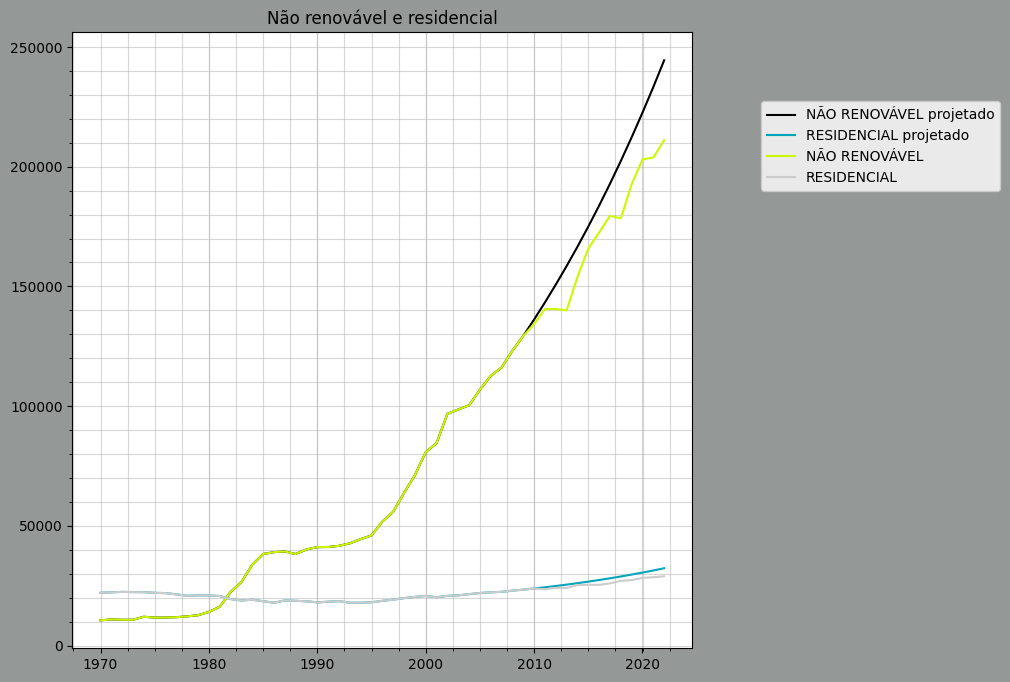

In [14]:
resultado1 = df.projection_var(40, [(0, 'NÃO RENOVÁVEL'), ('Consumo_Final_por_Setor', 'RESIDENCIAL')], 'Não renovável e residencial')

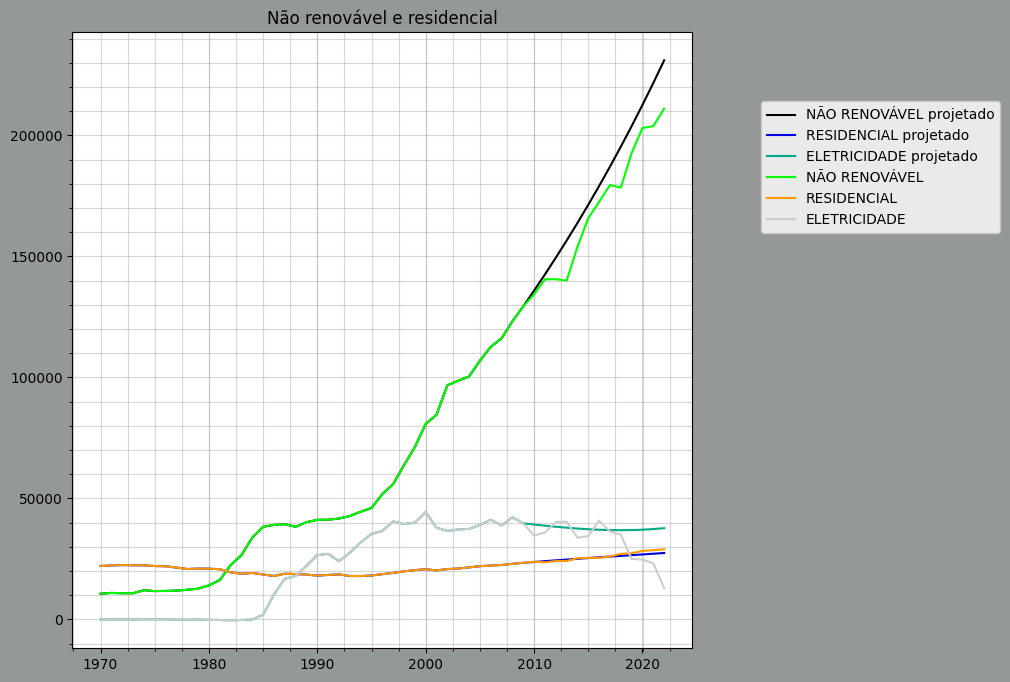

In [15]:
resultado2 = df.projection_var(40, [(0, 'NÃO RENOVÁVEL'), ('Consumo_Final_por_Setor', 'RESIDENCIAL'), ('Dependência_Externa_de_Energia', 'ELETRICIDADE')], 'Não renovável e residencial')

In [25]:
resultado1['NÃO RENOVÁVEL projetado'].tail()

ANO
2018-01-01    202377.733544
2019-01-01    212269.150523
2020-01-01     222566.93853
2021-01-01    233286.733388
2022-01-01    244444.790503
Name: NÃO RENOVÁVEL projetado, dtype: object

In [26]:
resultado1['NÃO RENOVÁVEL'].tail()

ANO
2018-01-01    178417.263503
2019-01-01    192643.222453
2020-01-01    203062.441752
2021-01-01    203837.857253
2022-01-01    211079.310819
Name: NÃO RENOVÁVEL, dtype: object

In [32]:
erro1 = sm.tools.eval_measures.mse(resultado1['NÃO RENOVÁVEL projetado'], resultado1['NÃO RENOVÁVEL'], axis=0)
erro2 = sm.tools.eval_measures.mse(resultado2['NÃO RENOVÁVEL projetado'], resultado2['NÃO RENOVÁVEL'], axis=0)
erro3 = sm.tools.eval_measures.mse(resultado1['RESIDENCIAL projetado'], resultado1['RESIDENCIAL'], axis=0)
erro4 = sm.tools.eval_measures.mse(resultado2['RESIDENCIAL projetado'], resultado2['RESIDENCIAL'], axis=0)

In [35]:
erro1/erro2

2.3983479569787347

In [33]:
erro3/erro4

5.367739024679909